In [57]:
import csv
import cv2
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [58]:
def read_image(source_path):
    filename = source_path.split('/')[-1]
    current_path = '/home/yue/CarND-Behavioral-Cloning/Training_data3/IMG/' + filename
    image = cv2.imread(current_path)
    converted_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return converted_image





In [59]:
!pwd

/home/yue/CarND-Behavioral-Cloning


In [60]:
lines = []
with open('/home/yue/CarND-Behavioral-Cloning/Training_data3/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
    

6681


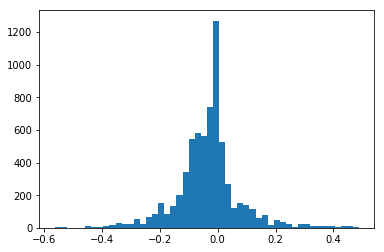

In [39]:
steers= []
count = 0


for line in lines[:]:
    steer = float(line[3])
    
    steers.append(steer)   
    #steers.append(-steer)
    
    #steers.append(steer + 0.2)
    #steers.append(steer - 0.2)
    #steers.append(-steer + 0.2)
    #steers.append(-steer - 0.2)
    
       
 
print(len(steers))   
num_bins = 50

n, bins, patches = plt.hist(steers, num_bins)

#n, bins = np.histogram(steers, num_bins)


In [42]:
images_center_path = []
images_left_path = []
images_right_path = []


for i in range(len(lines)):
    images_center_path.append(lines[i][0])
    images_left_path.append(lines[i][1])
    images_right_path.append(lines[i][2])
    
print(len(images_center_path))


6681


2745
2745


(array([  4.,   5.,   1.,   1.,   1.,  12.,   2.,   4.,  12.,  15.,  27.,
         26.,  21.,  53.,  26.,  65.,  84., 137.,  82., 132., 125., 137.,
        128., 127., 137., 118., 110., 133., 136., 123., 135., 133., 116.,
         62.,  76.,  16.,  46.,  37.,  22.,   3.,  21.,  21.,   9.,  11.,
          8.,  11.,   7.,  11.,  11.,   5.]),
 array([-0.5639098 , -0.54285717, -0.52180454, -0.5007519 , -0.47969927,
        -0.45864664, -0.43759401, -0.41654138, -0.39548874, -0.37443611,
        -0.35338348, -0.33233085, -0.31127822, -0.29022558, -0.26917295,
        -0.24812032, -0.22706769, -0.20601506, -0.18496242, -0.16390979,
        -0.14285716, -0.12180453, -0.1007519 , -0.07969926, -0.05864663,
        -0.037594  , -0.01654137,  0.00451126,  0.0255639 ,  0.04661653,
         0.06766916,  0.08872179,  0.10977442,  0.13082706,  0.15187969,
         0.17293232,  0.19398495,  0.21503758,  0.23609022,  0.25714285,
         0.27819548,  0.29924811,  0.32030074,  0.34135338,  0.36240601,
 

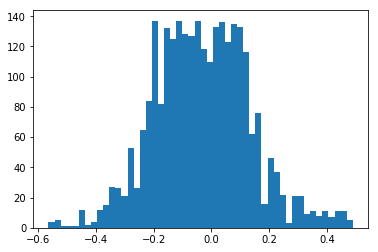

In [43]:
keep_probs = []
target = len(steers)/50

remove_list = []

for i in range(num_bins):
    if n[i] < target:
        keep_probs.append(1.)
    else:
        keep_probs.append(target/n[i])

for i in range(len(steers)):
    for j in range(num_bins):
        if steers[i] > bins[j] and steers[i] <= bins[j+1]:
            if np.random.rand() > keep_probs[j]:
                remove_list.append(i)

steers = np.delete(steers, remove_list)
images_center_path = np.delete(images_center_path, remove_list)
images_left_path = np.delete(images_left_path, remove_list)
images_right_path = np.delete(images_right_path, remove_list)



print(len(steers))
print(len(images_center_path))

plt.hist(steers, num_bins)
            


In [47]:
images_center = []
images_left = []
images_right = []
org_steers = []

for line in lines:
    images_center.append(read_image(line[0]))
    images_left.append(read_image(line[1]))
    images_right.append(read_image(line[2]))
    org_steers.append(line[3])
    



In [49]:
print(len(images_center))
print(len(org_steers))

6681
6681


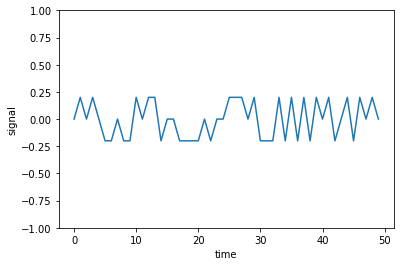

In [7]:

plt.plot(steers[0:50]);
plt.xlabel('time')
plt.ylabel('signal')
plt.ylim(-1,1);

(160, 320, 3)


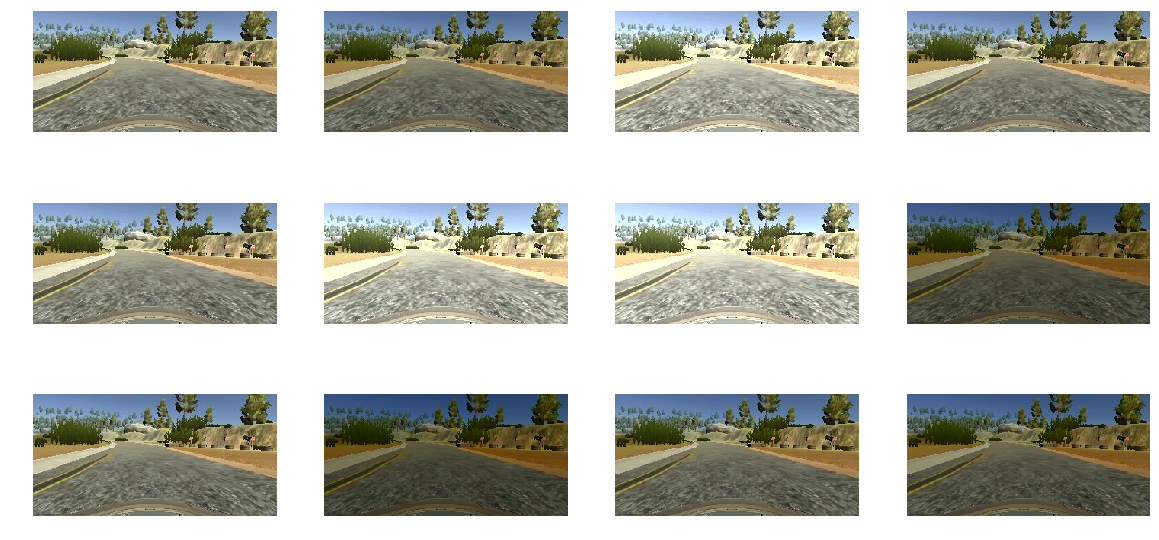

In [10]:
def brightness_image(image):
    image_tmp = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    image_tmp = np.array(image_tmp, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image_tmp[:,:,0] = image_tmp[:,:,0]*random_bright
    image_tmp[:,:,0][image_tmp[:,:,0]>255]  = 255
    image_tmp = np.array(image_tmp, dtype = np.uint8)
    image_tmp = cv2.cvtColor(image_tmp,cv2.COLOR_YUV2RGB)
    
    return image_tmp


plt.figure(figsize=(20,10))
plt.subplot(3,4,1)
plt.imshow(images_center[0])
print(images_center[0].shape)
plt.axis('off')
for i in range(1,12):
    plt.subplot(3,4,i+1)
    plt.imshow(brightness_image(images_center[0]))
    plt.axis('off')
    





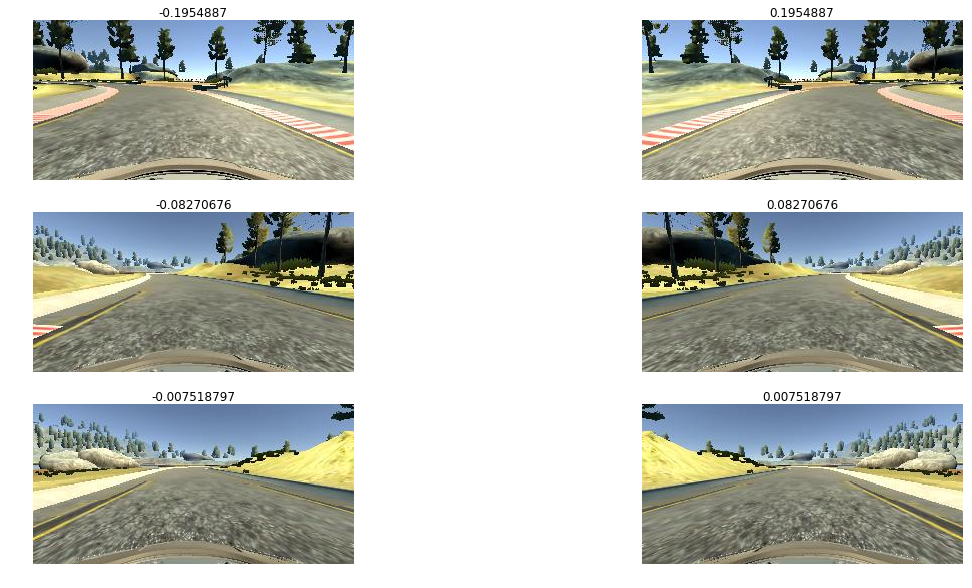

In [54]:
plt.figure(figsize=(20,10))
offset = 2030

plt.subplot(3,2,1)
plt.imshow(images_center[offset])
plt.axis('off')
plt.title(float(org_steers[offset]))
    
plt.subplot(3,2,2)
plt.imshow(np.fliplr(images_center[offset]))
plt.axis('off')
plt.title(-float(org_steers[offset]))


plt.subplot(3,2,3)
plt.imshow(images_center[50+offset])
plt.axis('off')
plt.title(float(org_steers[50+offset]))
    
plt.subplot(3,2,4)
plt.imshow(np.fliplr(images_center[50+offset]))
plt.axis('off')
plt.title(-float(org_steers[50+offset]))


plt.subplot(3,2,5)
plt.imshow(images_center[100+offset])
plt.axis('off')
plt.title(float(org_steers[100+offset]))
    
plt.subplot(3,2,6)
plt.imshow(np.fliplr(images_center[100+offset]))
plt.axis('off')
plt.title(-float(org_steers[100+offset]))
    

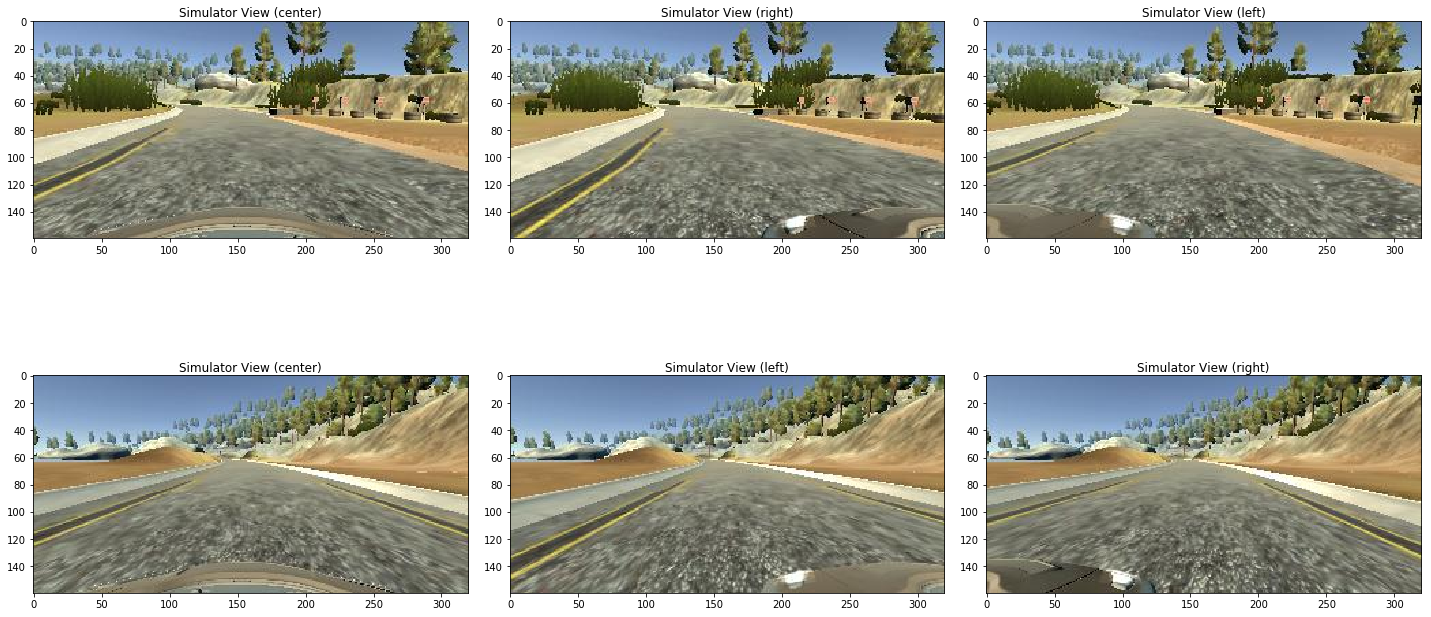

In [66]:

   
f, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))
f.tight_layout()

ax1.imshow(images_center[0])
ax1.set_title('Simulator View (center)', fontsize=12)
ax1

ax2.imshow(images_left[0])
ax2.set_title('Simulator View (right)', fontsize=12)

ax3.imshow(images_right[0])
ax3.set_title('Simulator View (left)', fontsize=12)

ax4.imshow(images_center[200])
ax4.set_title('Simulator View (center)', fontsize=12)

ax5.imshow(images_left[200])
ax5.set_title('Simulator View (left)', fontsize=12)

ax6.imshow(images_right[200])
ax6.set_title('Simulator View (right)', fontsize=12)


In [56]:
def translation_image(image, steer,trans_range):
    rand_num = np.random.uniform(-trans_range,trans_range)
    rand_num2 = np.random.uniform(-trans_range,trans_range)
    rows, cols, ch = image.shape
    h_shift = rand_num
    trans_steer = steer + h_shift * 0.004
    v_shift = rand_num2
    M = np.float32([[1,0,h_shift],[0,1,v_shift]])
    trans_image = cv2.warpAffine(image,M,(cols,rows))
    
    return trans_image, trans_steer

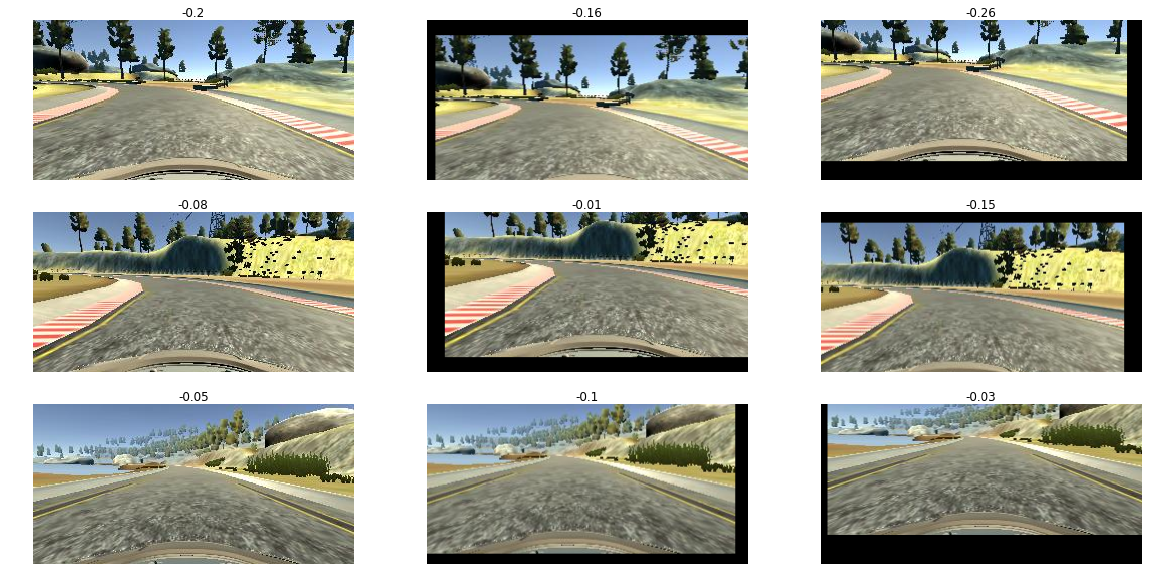

In [72]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
plt.imshow(images_center[offset])
plt.axis('off')
plt.title(np.round(float(org_steers[offset]),2))

plt.subplot(3,3,2)
trans_image, trans_steer = translation_image(images_center[offset], float(org_steers[offset]),30)
plt.imshow(trans_image)
plt.axis('off')
plt.title(np.round(trans_steer,2))

plt.subplot(3,3,3)
trans_image, trans_steer = translation_image(images_center[offset], float(org_steers[offset]),30)
plt.imshow(trans_image)
plt.axis('off')
plt.title(np.round(trans_steer,2))


plt.subplot(3,3,4)
plt.imshow(images_center[300+offset])
plt.axis('off')
plt.title(np.round(float(org_steers[300+offset]),2))

plt.subplot(3,3,5)
trans_image, trans_steer = translation_image(images_center[300+offset], float(org_steers[300+offset]),30)
plt.imshow(trans_image)
plt.axis('off')
plt.title(np.round(trans_steer,2))

plt.subplot(3,3,6)
trans_image, trans_steer = translation_image(images_center[300+offset], float(org_steers[300+offset]),30)
plt.imshow(trans_image)
plt.axis('off')
plt.title(np.round(trans_steer,2))


plt.subplot(3,3,7)
plt.imshow(images_center[500+offset])
plt.axis('off')
plt.title(np.round(float(org_steers[500+offset]),2))

plt.subplot(3,3,8)
trans_image, trans_steer = translation_image(images_center[500+offset], float(org_steers[500+offset]),30)
plt.imshow(trans_image)
plt.axis('off')
plt.title(np.round(trans_steer,2))

plt.subplot(3,3,9)
trans_image, trans_steer = translation_image(images_center[500+offset], float(org_steers[500+offset]),30)
plt.imshow(trans_image)
plt.axis('off')
plt.title(np.round(trans_steer,2))


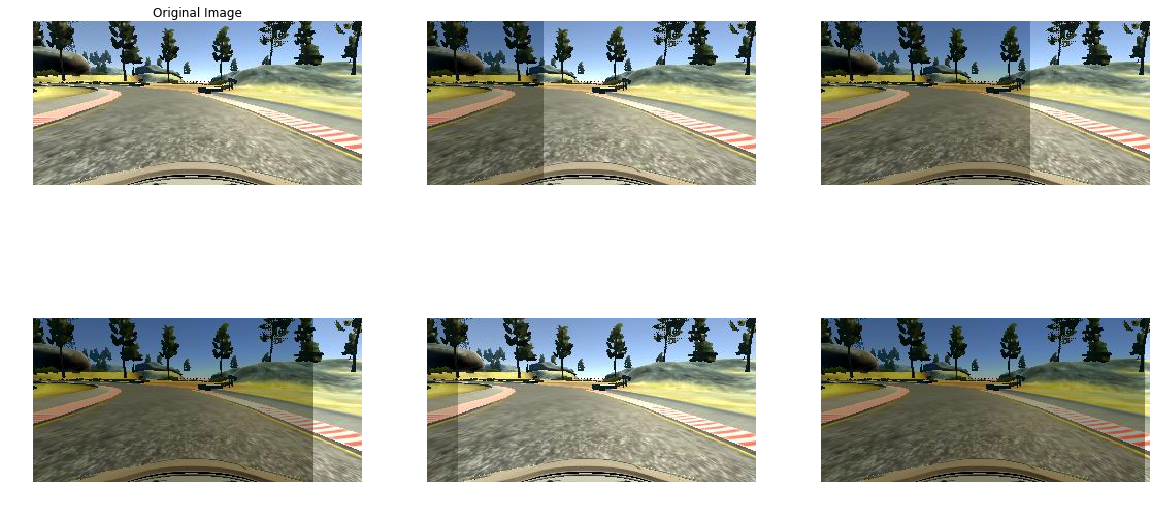

In [74]:
def random_shadow(image):
    new_img = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    new_img = np.array(new_img, dtype = np.float64)

    h,w = new_img.shape[0:2]
    mid = np.random.randint(0,w)


    factor = np.random.uniform(0.6,0.8)
    if np.random.rand() > .5:
        new_img[:,0:mid,0] *= factor
    else:
        new_img[:,mid:w,0] *= factor

    new_img = np.array(new_img, dtype = np.uint8)  
    shadow_image = cv2.cvtColor(new_img,cv2.COLOR_YUV2RGB)

    return shadow_image

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(images_center[offset])
plt.axis('off')
plt.title('Original Image')

for i in range(2,7):
    plt.subplot(2,3,i)
    shadow_image = random_shadow(images_center[offset])
    plt.imshow(shadow_image)
    plt.axis('off')

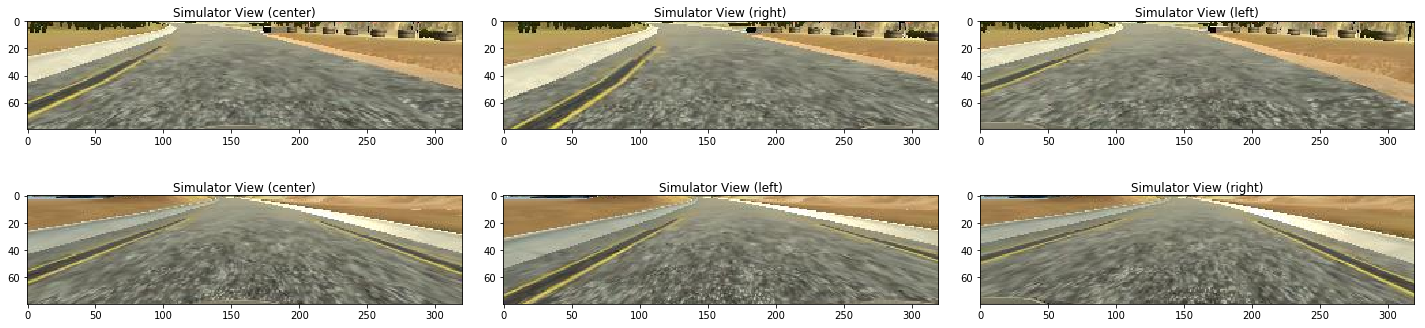

In [97]:

   
f, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(2, 3, figsize=(20,5))
f.tight_layout()

ax1.imshow(images_center[0][60:140,:])
ax1.set_title('Simulator View (center)', fontsize=12)

ax2.imshow(images_left[0][60:140,:])
ax2.set_title('Simulator View (right)', fontsize=12)

ax3.imshow(images_right[0][60:140,:])
ax3.set_title('Simulator View (left)', fontsize=12)

ax4.imshow(images_center[200][60:140,:])
ax4.set_title('Simulator View (center)', fontsize=12)

ax5.imshow(images_left[200][60:140,:])
ax5.set_title('Simulator View (left)', fontsize=12)
ax6.imshow(images_right[200][60:140,:])
ax6.set_title('Simulator View (right)', fontsize=12)


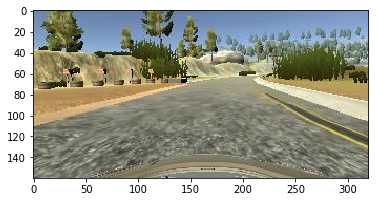

In [55]:
flip_image = np.fliplr(images_center[0])
plt.imshow(flip_image)

In [56]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda,Dropout,Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.
